# Analise de risco de credito com base a árvore de decisão 

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
import pickle 

In [20]:
# Carregamento do arquivo
with open ('Risco_credito.pkl', 'rb') as f:
    X_risco_credito, y_risco_credito = pickle.load(f)

In [21]:
# 2 = Credito, 0 = Divida, 1 = Garantia e 0 = renda)
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [22]:
# classes
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [23]:
# Treinamento da arvor
arvor_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvor_risco_credito.fit(X_risco_credito, y_risco_credito)


DecisionTreeClassifier(criterion='entropy')

In [24]:
# Visualizacao dos atributos para escolher os mais importantes ou valores maiores que os outros

In [25]:
# 0.41 = HISTORICO DE CREDITO, 0.064 = DIVIDA, 0.038 = Garantia e 0.48 = RENDA
arvor_risco_credito.feature_importances_

array([0.41391643, 0.06408636, 0.03885431, 0.4831429 ])

In [31]:
arvor_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

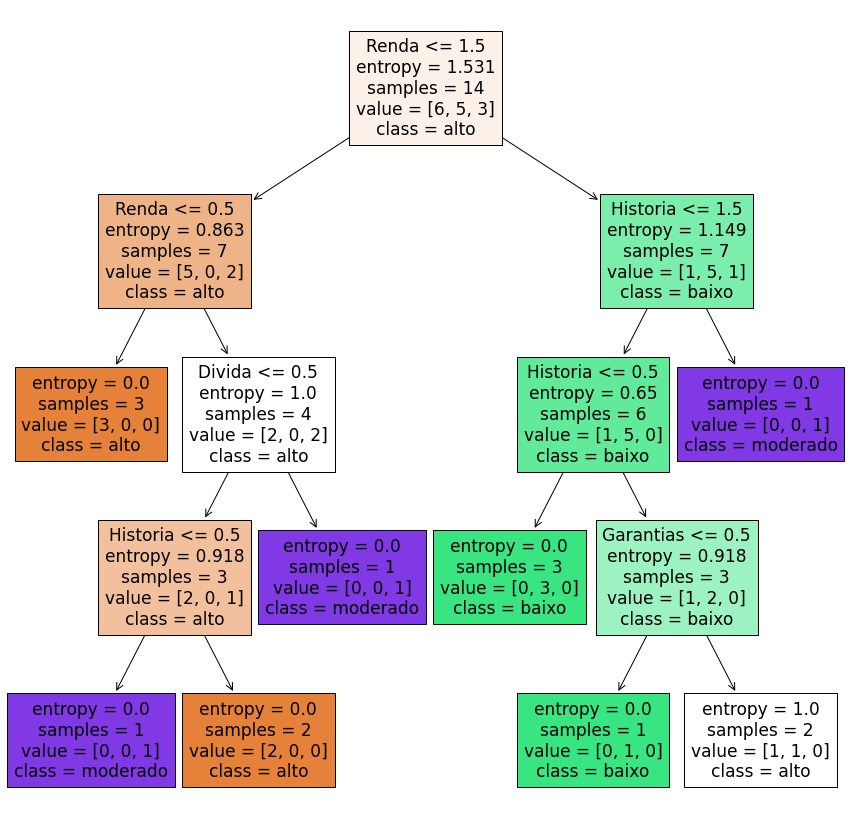

In [46]:
# Visualizacao da arvore de acordo as carateristicas do credor e respetivos riscos
from matplotlib import pyplot as plt
from sklearn import tree
previsores = ['Historia', 'Divida', 'Garantias', 'Renda'] #atribuindo atributos
figure, eixos = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
tree.plot_tree(arvor_risco_credito, feature_names=previsores, class_names=arvor_risco_credito.classes_, filled=True);

In [ ]:
#Classificacao de acordo o filtro de dados
#Historia boa, divida alta, garantias nenhuma, renda > 35
# HIstoria ma ou ruim, divida alta, garantias adequadas e renda <15


In [44]:
previsores = arvor_risco_credito.predict([[0,0,1,2], [2,0,0,0]])
previsores

array(['baixo', 'alto'], dtype=object)